In [1]:
!pip install geopandas


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Specifica il file csv
file_path = r'C:\Users\melan\OneDrive\Documenti\GitHub\dscoding-projects\melany.gomez\myproject\temperature\GlobalLandTemperaturesByMajorCity.csv'

# leggi il file cvs
df = pd.read_csv(file_path)


In [4]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [5]:
import matplotlib.pyplot as plt


In [6]:
print(df.head())


           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


In [7]:
print(df.columns)


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [8]:
def latitude(x):
    return float(x[:-1]) if x[-1:] == 'N' else -float(x[:-1])

def longitude(x):
    return float(x[:-1]) if x[-1:] == 'E' else -float(x[:-1])

def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

In [9]:
# elimina valori NaN
df = df.dropna()

# 'dt' in datetime
df['dt'] = pd.to_datetime(df['dt'])


df['Latitude'] = df['Latitude'].apply(latitude)
df['Longitude'] = df['Longitude'].apply(longitude)

# riordina DataFrame,'dt' in ordine discendente
df = df.sort_values(by='dt', ascending=False)
print(df[df['Country'] == 'China'])

C:\Users\melan\AppData\Local\Temp\ipykernel_25024\1596538237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'] = pd.to_datetime(df['dt'])
C:\Users\melan\AppData\Local\Temp\ipykernel_25024\1596538237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = df['Latitude'].apply(latitude)


               dt  AverageTemperature  AverageTemperatureUncertainty  \
83482  2013-08-01              22.322                          0.290   
239175 2013-08-01              24.528                          0.840   
79199  2013-08-01              28.700                          0.864   
178563 2013-08-01              27.054                          0.233   
49354  2013-08-01              23.113                          0.369   
...           ...                 ...                            ...   
236859 1820-08-01              20.683                          2.218   
220711 1820-08-01              18.194                          2.231   
49356  1820-08-01              17.288                          2.018   
47038  1820-08-01              19.674                          2.283   
225347 1820-08-01              22.822                          2.218   

             City Country  Latitude  Longitude  
83482      Harbin   China     45.81     125.77  
239175       Xian   China     34.56  

C:\Users\melan\AppData\Local\Temp\ipykernel_25024\1596538237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = df['Longitude'].apply(longitude)


In [10]:
# Uso groupby per raggruppare città in Paesi e ottenre data più recente dei dati
actual_df = df.groupby('Country').first().reset_index()

# Imprimir el DataFrame
actual_df

,Country,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
0,Afghanistan,2013-08-01,24.974,0.459,Kabul,34.56,70.05
1,Angola,2013-08-01,21.130,1.169,Luanda,-8.84,13.78
2,Australia,2013-08-01,16.126,0.325,Sydney,-34.56,151.78
3,Bangladesh,2013-08-01,29.154,0.502,Dhaka,23.31,90.00
4,Brazil,2013-08-01,23.928,0.805,Salvador,-13.66,-38.81
5,Burma,2013-08-01,27.236,0.377,Rangoon,16.87,95.44
6,Canada,2013-09-01,14.599,1.274,Toronto,44.20,-80.50
7,Chile,2013-08-01,0.839,0.390,Santiago,-32.95,-69.89
8,China,2013-08-01,22.322,0.290,Harbin,45.81,125.77
9,Colombia,2013-08-01,21.451,0.242,Bogotá,4.02,-74.73


In [11]:
# Carico i dati geospaziali mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.sort_values(by='name', ascending=True)
world

C:\Users\melan\AppData\Local\Temp\ipykernel_25024\808471309.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
103,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
125,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
82,43053054.0,Africa,Algeria,DZA,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
74,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...,...,...,...,...
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
157,29161922.0,Asia,Yemen,YEM,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
70,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [12]:
# funzione merge per combinare Dataframes 
actual_world = world.merge(actual_df, how='left', left_on='name', right_on='Country')

actual_world['AverageTemperature'] = actual_world['AverageTemperature'].fillna(17.5)
actual_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
0,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2013-08-01,24.974,0.459,Kabul,34.56,70.05
1,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",NaN,NaT,17.500,NaN,NaN,NaN,NaN
2,43053054.0,Africa,Algeria,DZA,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",NaN,NaT,17.500,NaN,NaN,NaN,NaN
3,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,2013-08-01,21.130,1.169,Luanda,-8.84,13.78
4,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaT,17.500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaT,17.500,NaN,NaN,NaN,NaN
173,29161922.0,Asia,Yemen,YEM,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",NaN,NaT,17.500,NaN,NaN,NaN,NaN
174,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",NaN,NaT,17.500,NaN,NaN,NaN,NaN
175,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2013-08-01,19.232,0.808,Harare,-18.48,30.42


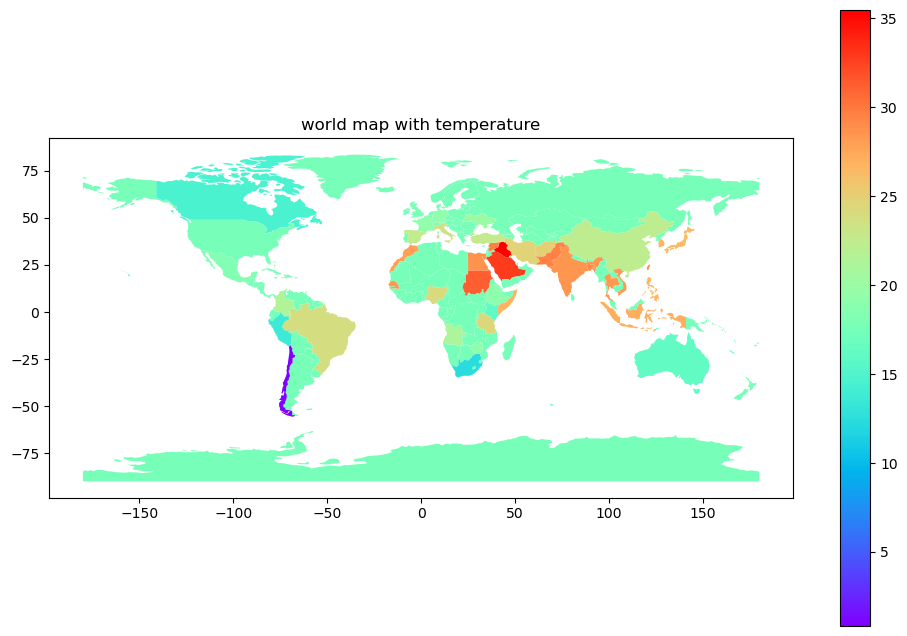

In [13]:
# Creare mappa, colori random 
actual_world.plot(column='AverageTemperature', cmap='rainbow', legend=True, figsize=(12, 8))

# titolo
plt.title('world map with temperature')


plt.show()

In [14]:
from bokeh.plotting import figure, show
from bokeh.models import GeoJSONDataSource, HoverTool, PanTool, WheelZoomTool
from bokeh.transform import linear_cmap
from bokeh.palettes import RdBu as colors

# legge dati geospaziali, GeoJSON
actual_world['dt'] = actual_world['dt'].astype(str)
world_json = actual_world.to_json()
geosource = GeoJSONDataSource(geojson=world_json)

colors = ['#0571b0', '#3690c0', '#67a9cf', '#92c5de', '#b9e1ec', '#ef8a62', '#f4a582', '#f7b2a4', '#f9c4c9', '#b2182b']


# palette colori
color_mapper = linear_cmap(field_name='AverageTemperature', palette=colors, low=min(actual_world['AverageTemperature']), high=max(actual_world['AverageTemperature']))


p = figure(title=" World Graph", width=800, height=400)

# disegna poligoni geospaziali + colori 'AverageTemperature'
p.patches('xs', 'ys', source=geosource, line_color="white", line_width=0.5, fill_color=color_mapper, fill_alpha=0.6)

# strumenti x interattivo
hover = HoverTool()
hover.tooltips = [("Country", "@name"), ("Average Temperature", "@AverageTemperature")]
p.add_tools(hover, PanTool(), WheelZoomTool())


show(p)

In [17]:
# Lee los datos geoespaciales y crea una fuente GeoJSON
actual_world['dt'] = actual_world['dt'].astype(str)
world_json = actual_world.to_json()
geosource = GeoJSONDataSource(geojson=world_json)

colors = ['#0571b0', '#3690c0', '#67a9cf', '#92c5de', '#b9e1ec', '#ef8a62', '#f4a582', '#f7b2a4', '#f9c4c9', '#b2182b']


# Configura la paleta de colores
color_mapper = linear_cmap(field_name='AverageTemperature', palette=colors, low=min(actual_world['AverageTemperature']), high=max(actual_world['AverageTemperature']))

# Configura la figura de Bokeh para el mapa del mundo
map_figure = figure(title="Interactive World Graph", width=800, height=400)

# Dibuja los polígonos geoespaciales en la figura
map_figure.patches('xs', 'ys', source=geosource, line_color="white", fill_color=color_mapper, line_width=0.5, fill_alpha=0.6)

# Configura herramientas interactivas (Herramienta de información al pasar el cursor)
hover = HoverTool()
hover.tooltips = [("País", "@name"), ("Average Temperature", "@AverageTemperature")]
map_figure.add_tools(hover)

# Crea datos para la función lineal
x = np.linspace(0, 10, 100)  # Valores de x de 0 a 10
y = 2 * x  # Función lineal y = 2x

# Configura la figura de Bokeh para la función lineal
line_figure = figure(title="Linear Function", width=400, height=400)
line_figure.line(x, y, line_color="blue", line_width=2)

# Crea un diseño de fila para mostrar ambos gráficos lado a lado
layout = row(map_figure, line_figure)

# Muestra el diseño
show(layout)

In [16]:
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20

# legge dati geospaziali, GeoJSON
actual_world['dt'] = actual_world['dt'].astype(str)
world_json = actual_world.to_json()
geosource = GeoJSONDataSource(geojson=world_json)

colors = ['#0571b0', '#3690c0', '#67a9cf', '#92c5de', '#b9e1ec', '#ef8a62', '#f4a582', '#f7b2a4', '#f9c4c9', '#b2182b']


# Configura la paleta de colores
color_mapper = linear_cmap(field_name='AverageTemperature', palette=colors, low=min(actual_world['AverageTemperature']), high=max(actual_world['AverageTemperature']))

# Configura la figura de Bokeh para el mapa del mundo
map_figure = figure(title="Interactive world graph", width=800, height=400)

# disegna poligoni geospaziali 
map_figure.patches('xs', 'ys', source=geosource, line_color="white", fill_color=color_mapper, line_width=0.5, fill_alpha=0.6)

# # strumenti x interattivo
hover = HoverTool()
hover.tooltips = [("Country", "@name"), ("Average Temperature", "@AverageTemperature")]
map_figure.add_tools(hover)

# # Bokeh per funzione lineare
line_figure = figure(title="Temperature Timeline", width=800, height=400, x_axis_label='dt', y_axis_label='AverageTemperature')

# Itera a través de las ciudades únicas en el DataFrame
# cities = df['City'].unique()
cities = (df[df['Country'] == 'Italy'])['City'].unique()
print(cities)

for i, city in enumerate(cities):
    # Filtra dati per città attuale
    city_data = df[df['City'] == city]

    # Crea dati per città attuale
    source = ColumnDataSource(data={
        'x': city_data['dt'],
        # 'y': (city_data['AverageTemperature'] - city_data['AverageTemperature'].min()) / (city_data['AverageTemperature'].max() - city_data['AverageTemperature'].min()),
        # 'y': city_data['AverageTemperature'],
        'y': np.log10(city_data['AverageTemperature']),
    })

    # colore random
    random_color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # disegno linea città attuale
    line_figure.line('x', 'y', source=source, line_color=random_color, line_width=2, legend_label=city)

# legend
line_figure.legend.title = 'City'
line_figure.legend.label_text_font_size = "10px"


# Crea un diseño de fila para mostrar ambos gráficos lado a lado
layout = row(map_figure, line_figure)


show(layout)

['Rome']


C:\Users\melan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
